# Analyze visually evoked responses (ERPs) 

## Set-up

#### Set path

In [1]:
# Define paths
REPO_PATH = r"C:\Users\Andre\projects\v1_v4_1024_elec" # set this
PROJECT_PATH = r'G:\Shared drives\v1_v4_1024'


#### Imports

In [2]:
# general
import numpy as np
import matplotlib.pyplot as plt
import os
import odml
from scipy.signal import find_peaks, peak_widths

# custom
import sys
sys.path.append(REPO_PATH)
from scripts.plots import plot_schematic

#### Settings

In [25]:
# Session of interest (will ultimately apply to all sessions)
SESSIONS = ["A_SNR_140819", "L_SNR_250717"]
SESSION = "A_SNR_140819"

# Dataset details
FS = 500 # sampling frequency
N_CHANS = 64


#### Functions

## Main

#### Create output directory

In [4]:
dir_out = f"{PROJECT_PATH}/figures/erp"
if not os.path.exists(dir_out):
    os.makedirs(dir_out)

#### load data

In [5]:
# load example LFP epochs
dir_input = fr"G:\Shared drives\v1_v4_1024\data\lfp\lfp_epochs\{SESSION}"
fname_in = fr"{dir_input}\NSP1_array1_LFP.npy"
lfp = np.load(fname_in)
print(f"LFP Shape: \t{lfp.shape} (trials x channels x samples)")

LFP Shape: 	(170, 64, 500) (trials x channels x samples)


In [6]:
# load metadata for example sessions
odml_path = fr"{PROJECT_PATH}\data\dataset\{SESSION}\metadata_{SESSION}.odml"
metadata = odml.load(odml_path)

warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document section <odML>  (line 5)
Validation found 0 errors and 1 warnings in 0 Sections and 1 Properties.


### Compute ERP

In [7]:
# average over trials
erp = np.mean(lfp, axis=0)
print(f"ERP Shape: \t{erp.shape} (channels x samples)")

ERP Shape: 	(64, 500) (channels x samples)


### Plot ERP

Text(0, 0.5, 'Voltage (uV)')

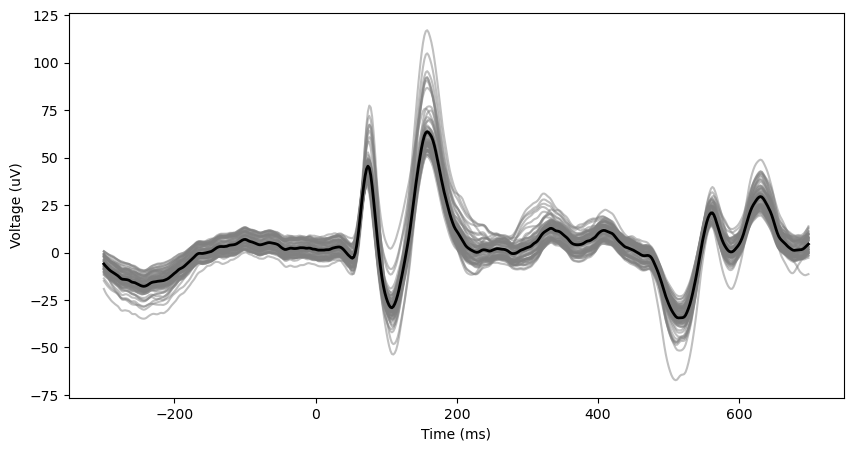

In [8]:

# init time-vector
time = np.arange(-0.3, 0.7, 1/FS) * 1000

# plot erp
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(time, erp.T, color='grey', alpha=0.5) # plot each channel 
ax.plot(time, np.mean(erp, axis=0), color='k', linewidth=2) # plot average across channels

ax.set_xlabel("Time (ms)")
ax.set_ylabel("Voltage (uV)")

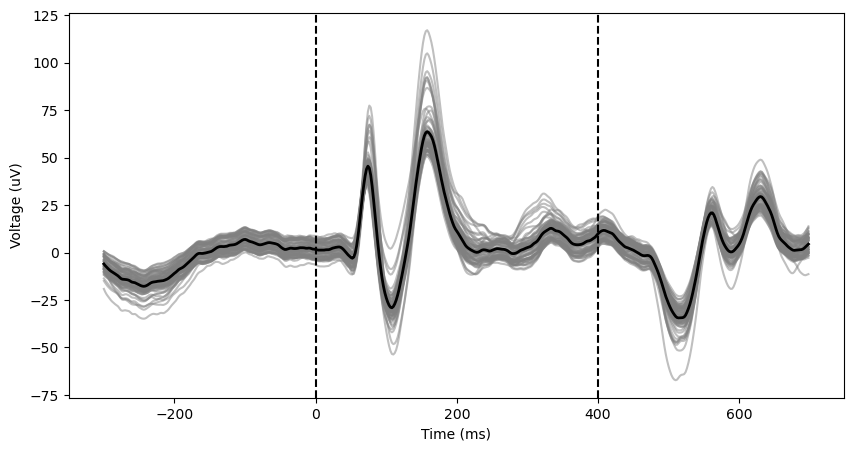

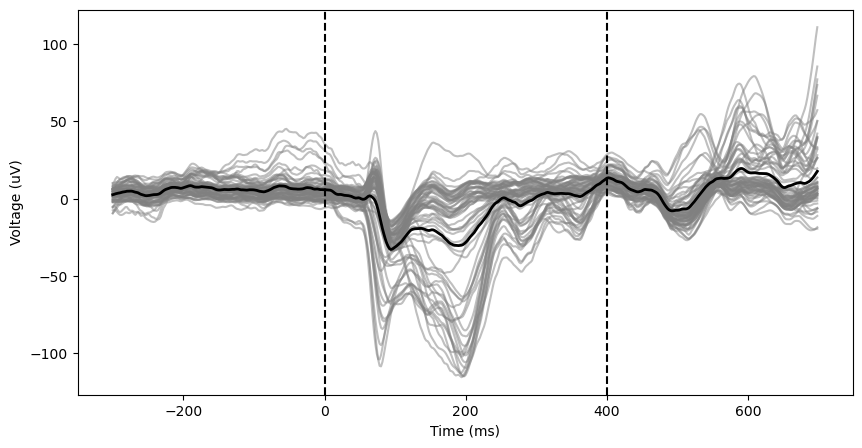

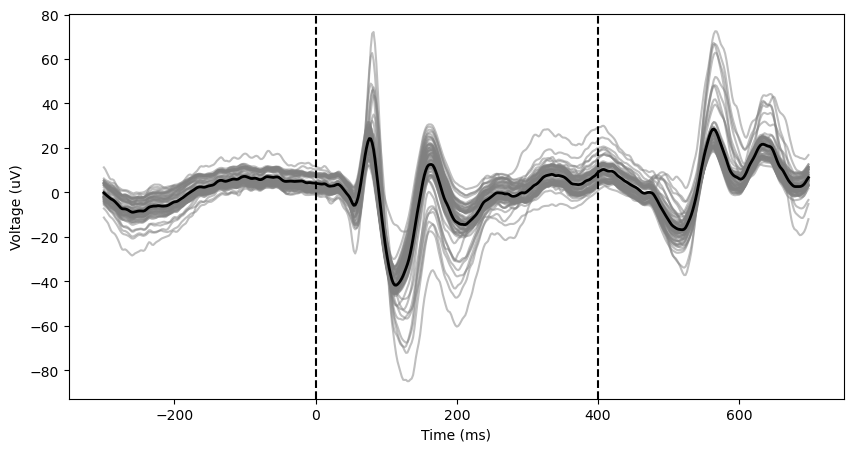

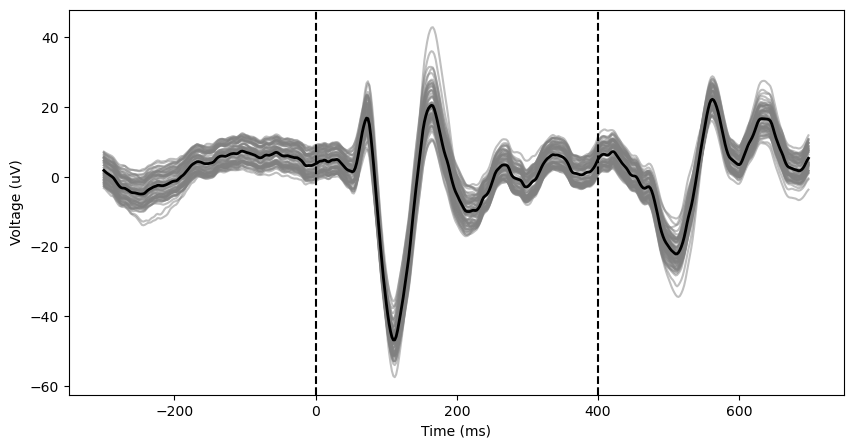

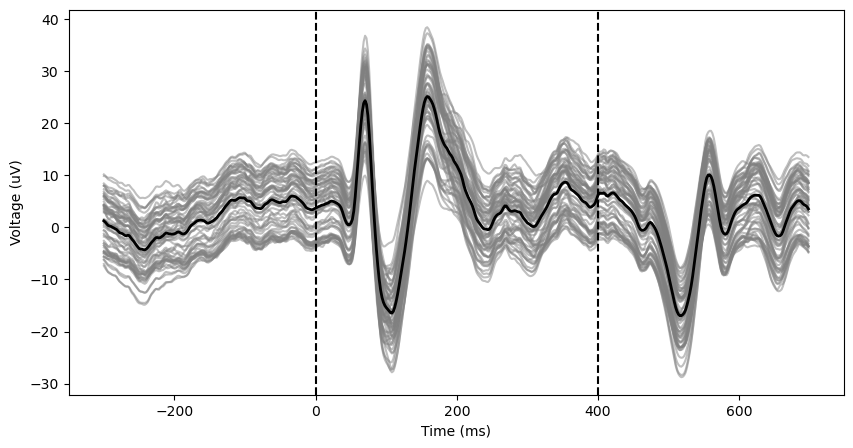

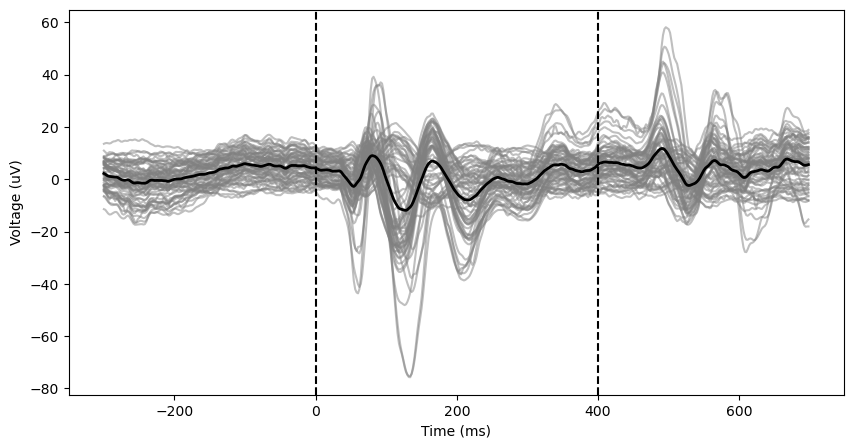

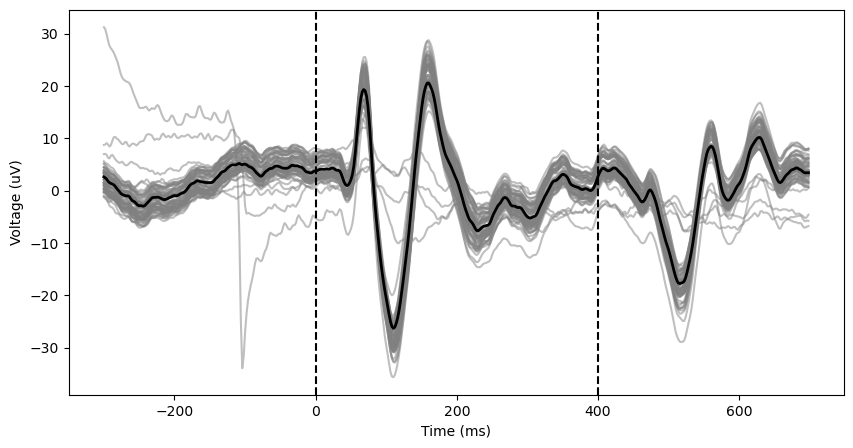

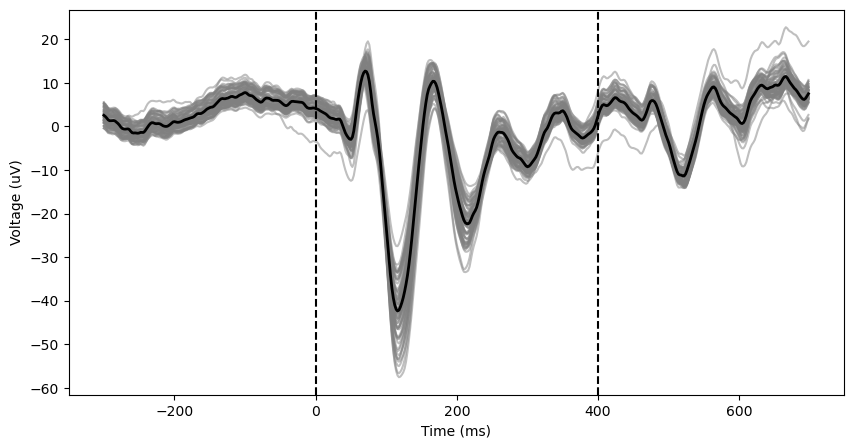

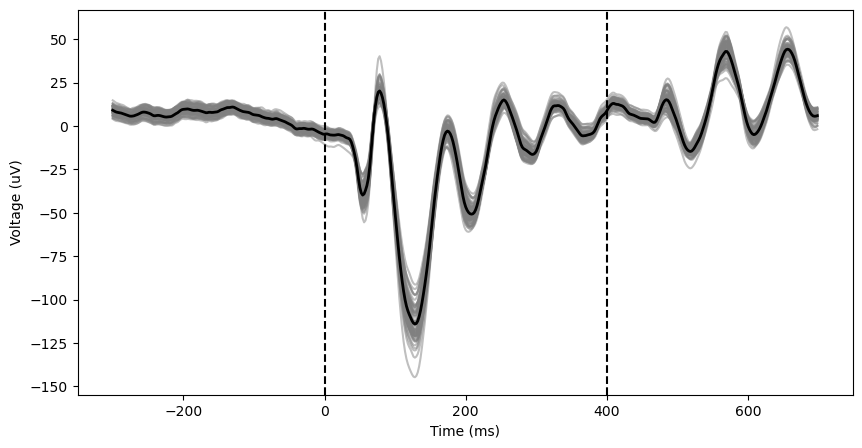

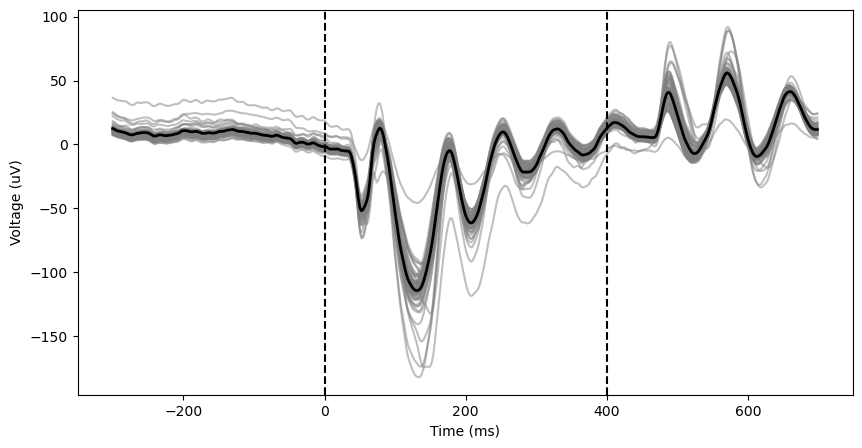

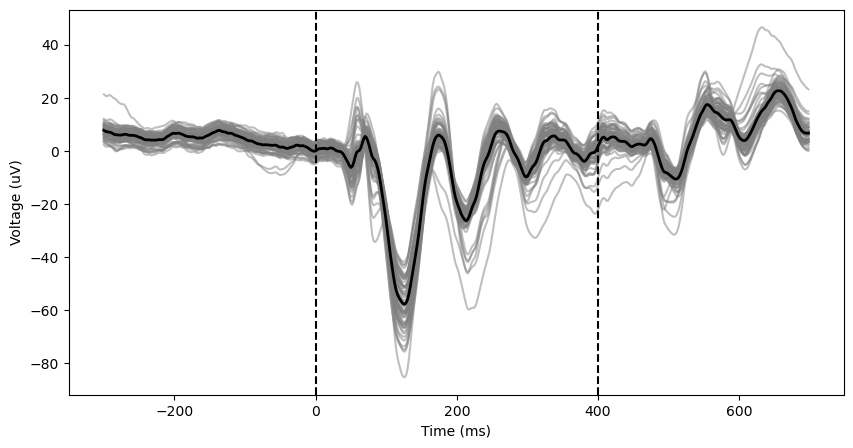

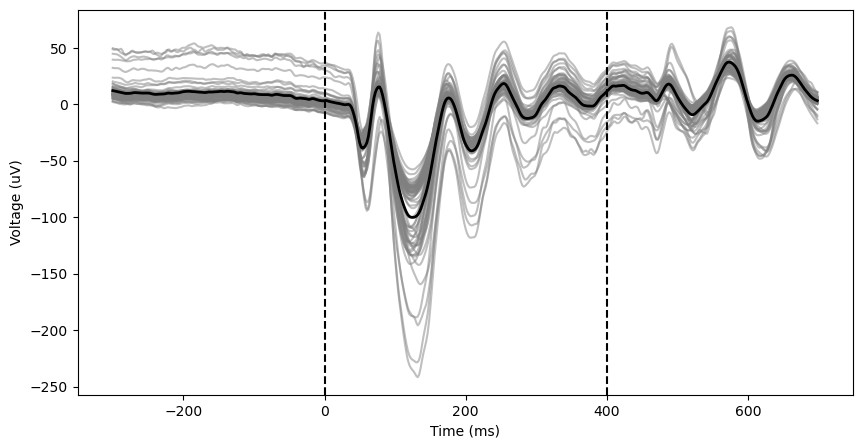

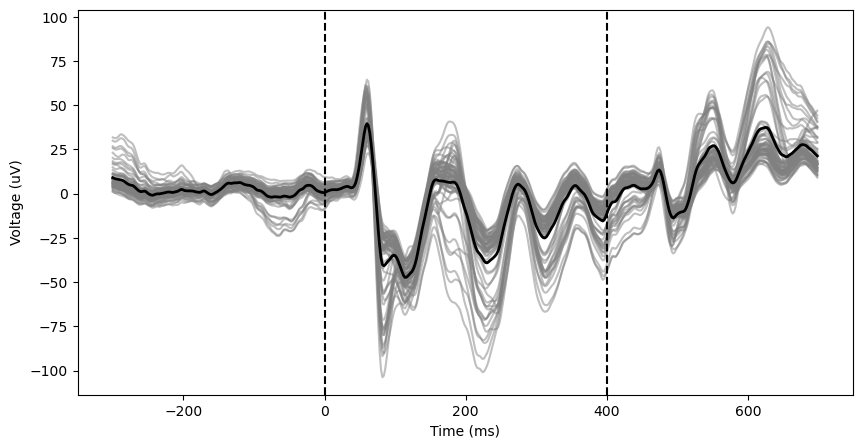

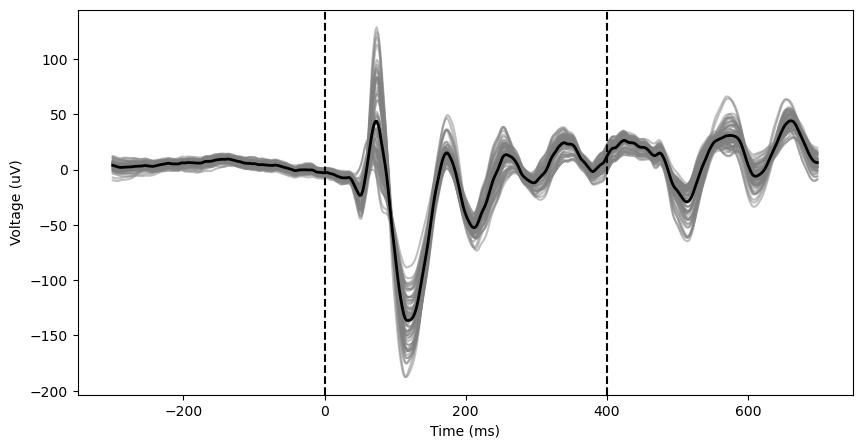

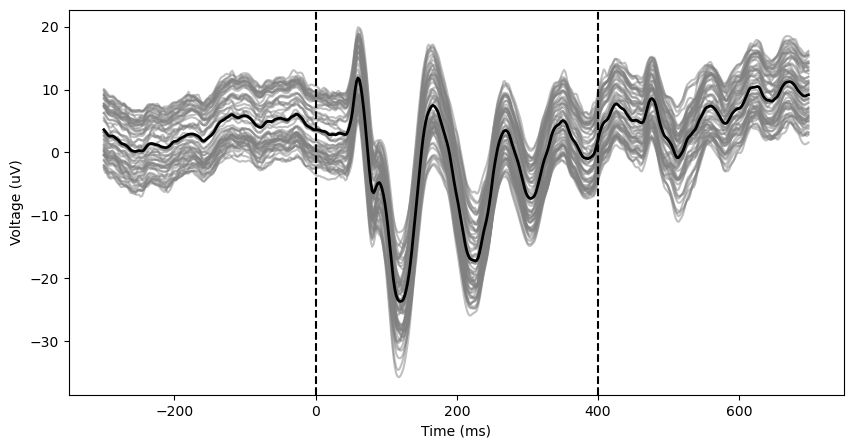

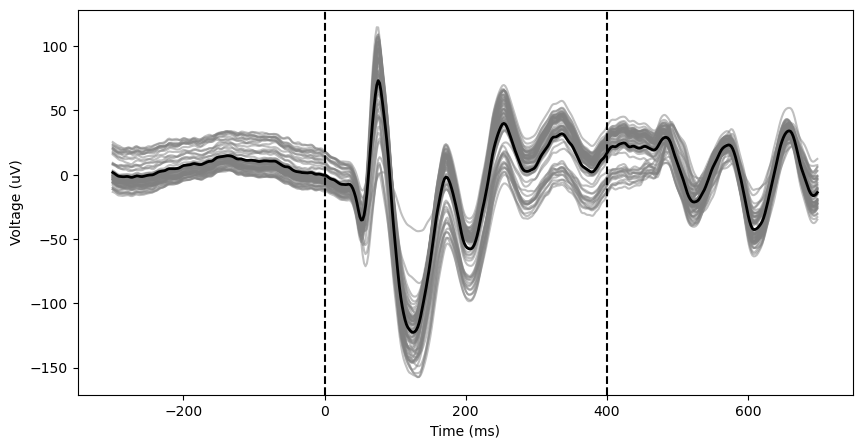

In [21]:
# plotting for each array in a session
dir_input = fr"G:\Shared drives\v1_v4_1024\data\lfp\lfp_epochs\{SESSION}"
idx_nsp = 1
N_ARRAYS = 16


for i_array in range(1, N_ARRAYS+1):
    fname_in = fr"{dir_input}\NSP{idx_nsp}_array{i_array}_LFP.npy"
    lfp = np.load(fname_in)

    erp = np.mean(lfp, axis=0)

    time = np.arange(-0.3, 0.7, 1/FS) * 1000 # init time-vector

    # plot
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(time, erp.T, color='grey', alpha=0.5)
    ax.plot(time, np.mean(erp, axis=0), color='k', linewidth=2) # plot average across channels
    
    ax.set_xlabel("Time (ms)")
    ax.set_ylabel("Voltage (uV)")

    ax.axvline(0, color='k', linestyle='--')
    ax.axvline(400, color='k', linestyle='--')

    #fig.savefig(fr"C:\Users\Andre\Pictures\NSP{idx_nsp}_array{i_array}_LFP.png")

    # increment
    if i_array % 2 == 0:
        idx_nsp += 1


In [10]:
fig.savefig?

Signature: fig.savefig(fname, *, transparent=None, **kwargs)
Docstring:
Save the current figure.

Call signature::

  savefig(fname, *, dpi='figure', format=None, metadata=None,
          bbox_inches=None, pad_inches=0.1,
          facecolor='auto', edgecolor='auto',
          backend=None, **kwargs
         )

The available output formats depend on the backend being used.

Parameters
----------
fname : str or path-like or binary file-like
    A path, or a Python file-like object, or
    possibly some backend-dependent object such as
    `matplotlib.backends.backend_pdf.PdfPages`.

    If *format* is set, it determines the output format, and the file
    is saved as *fname*.  Note that *fname* is used verbatim, and there
    is no attempt to make the extension, if any, of *fname* match
    *format*, and no extension is appended.

    If *format* is not set, then the format is inferred from the
    extension of *fname*, if there is one.  If *format* is not
    set and *fname* has no ext

In [30]:
# plotting the mean for each array in a session
dir_input = fr"G:\Shared drives\v1_v4_1024\data\lfp\lfp_epochs\{SESSION}"
idx_nsp = 1
N_ARRAYS = 16
N_SAMPLES = 500 

# create empty array for erp mean
erps= np.zeros([N_ARRAYS,N_CHANS, N_SAMPLES])

# init time-vector
time = np.arange(-0.3, 0.7, 1/FS) * 1000

for i_array in range(1, N_ARRAYS):
    fname_in = fr"{dir_input}\NSP{idx_nsp}_array{i_array}_LFP.npy"
    lfp = np.load(fname_in)

    erp = np.mean(lfp, axis=0)

    erps[i_array-1] = erp

    # increment
    if i_array % 2 == 0:
        idx_nsp += 1

erp_array = np.mean(erps, axis=1)
erp_array.shape

(16, 500)

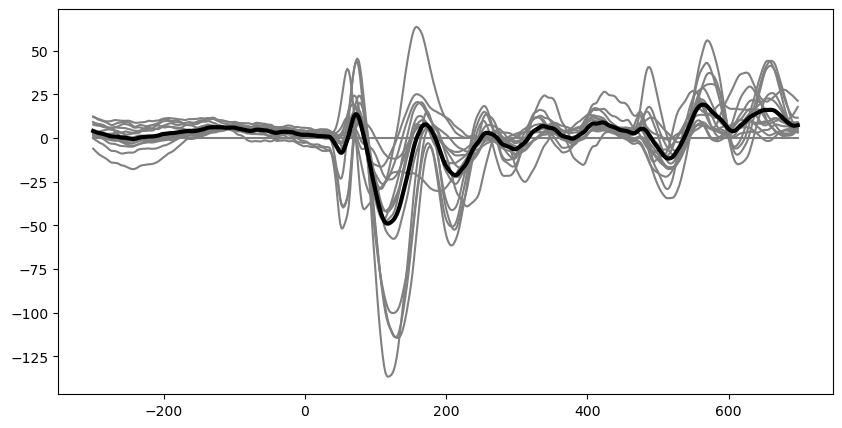

In [34]:
# plot mean of all arrays
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(time, erp_array.T, color='grey')
ax.plot(time, np.mean(erp_array, axis=0), color='k', linewidth=3);

In [35]:
# save mean of all arrays together
allarrays_mean = np.mean(erp_array, axis=0)

In [71]:
mean = np.mean(allarrays_mean)
std = np.std(allarrays_mean)
height = mean + (std)
height

12.157693530927654

In [73]:
peaks_pos, properties_pos = find_peaks(allarrays_mean, height=height, distance = 10)
peaks_pos

array([186, 432, 480], dtype=int64)

NameError: name 'peaks_pos' is not defined

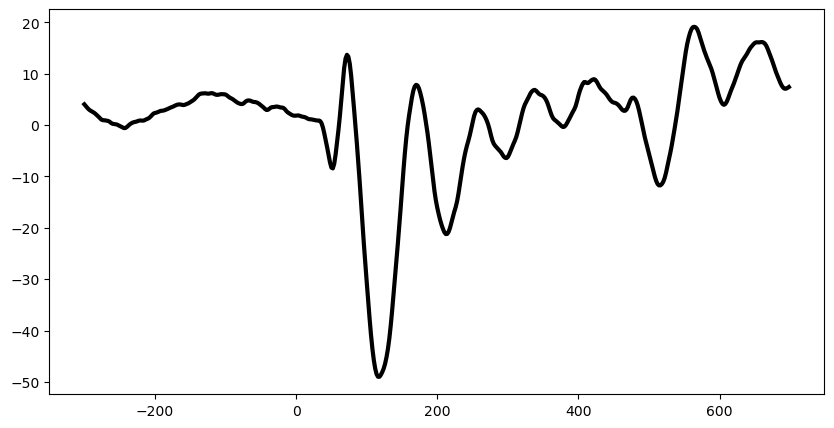

In [79]:

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(time, allarrays_mean, color='k', linewidth=3)
for value in peaks_pos:
    ax.axvline(time[value], color='k', linestyle='--')

peak_posamp = allarrays_mean[peaks_pos]
peak_posamp

array([-48.97383038, -21.20201409])

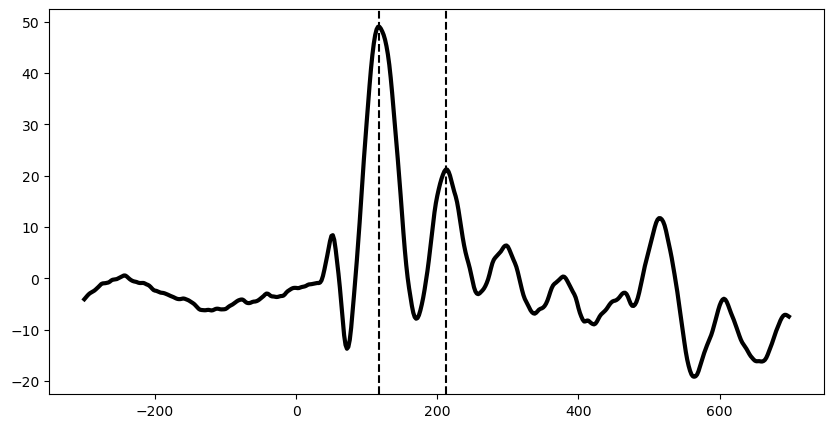

In [78]:
peaks_neg, properties_neg = find_peaks(-allarrays_mean, height=height, distance = 10)
peaks_neg

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(time, -allarrays_mean, color='k', linewidth=3)
for value in peaks_neg:
    ax.axvline(time[value], color='k', linestyle='--')

peak_negamp=allarrays_mean[peaks_neg]

### Quantify ERP 

In [15]:
# compute ERP parameters (latency, amplitude, width) for grand-average ERP (*first peak only)


In [16]:
# define function to define params

# def comp_erp_params():



In [17]:
# compute for each channel


In [18]:
# plot schematic of ERP params


### Repeat across subjects